In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\maslo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Загрузим уже обработанные в прошлом ДЗ данные!

In [2]:
df = pd.read_csv('C:/Users/maslo/Desktop/karpov_start_ml/2_module/15_lesson/materials/processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [3]:
### Центрируем данные
X_centered = X - X.mean()

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
PCA_dataset = pd.DataFrame(pca.fit_transform(X_centered), columns=['PCA_1', 'PCA_2'])

In [6]:
PCA_dataset['Surge_Pricing_Type'] = y

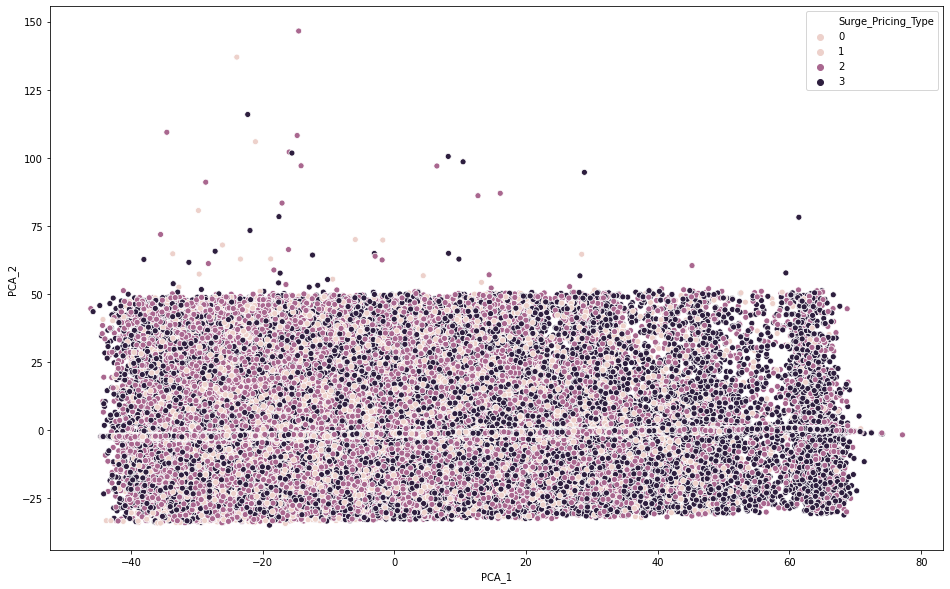

In [8]:
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)

sns.scatterplot(data=PCA_dataset, x='PCA_1', y='PCA_2', hue='Surge_Pricing_Type')

In [9]:
pca.explained_variance_ratio_

array([0.63176117, 0.21129863])

**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


In [12]:
pca_corrs = pd.concat([X.corrwith(PCA_dataset.PCA_1), X.corrwith(PCA_dataset.PCA_2)], axis=1)

In [14]:
pca_corrs.columns = ['PCA_1', 'PCA_2']

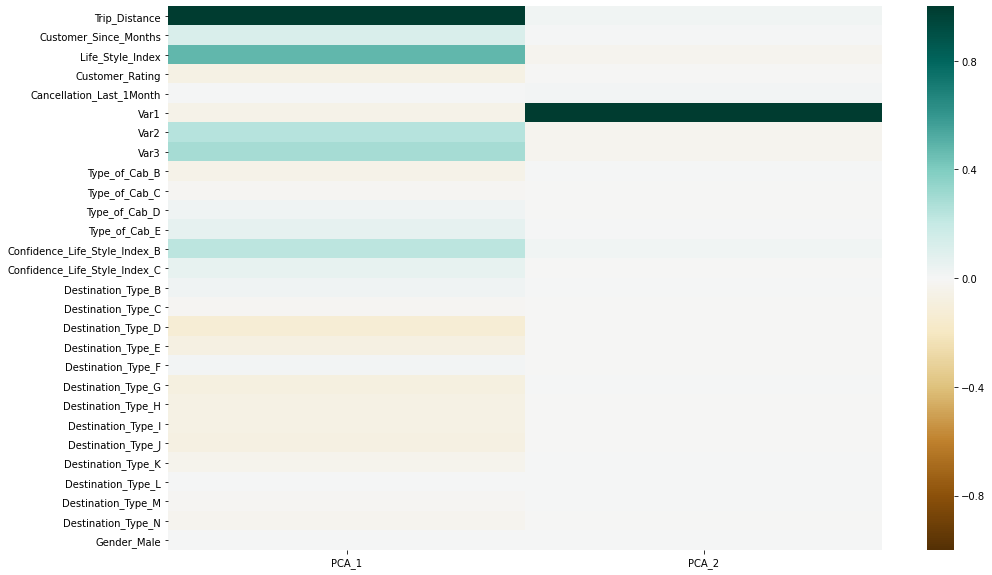

In [17]:
fig = plt.figure()
fig.set_size_inches(16, 10)

sns.heatmap(pca_corrs,
            xticklabels=pca_corrs.columns,
            yticklabels=pca_corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1
           )

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

In [21]:
pca_3d = PCA(n_components=3)
PCA_dataset_3d = pd.DataFrame(pca_3d.fit_transform(X_centered), columns=['PCA_1', 'PCA_2', 'PCA_3'])

In [22]:
PCA_dataset_3d['Surge_Pricing_Type'] = y

In [23]:
y.value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

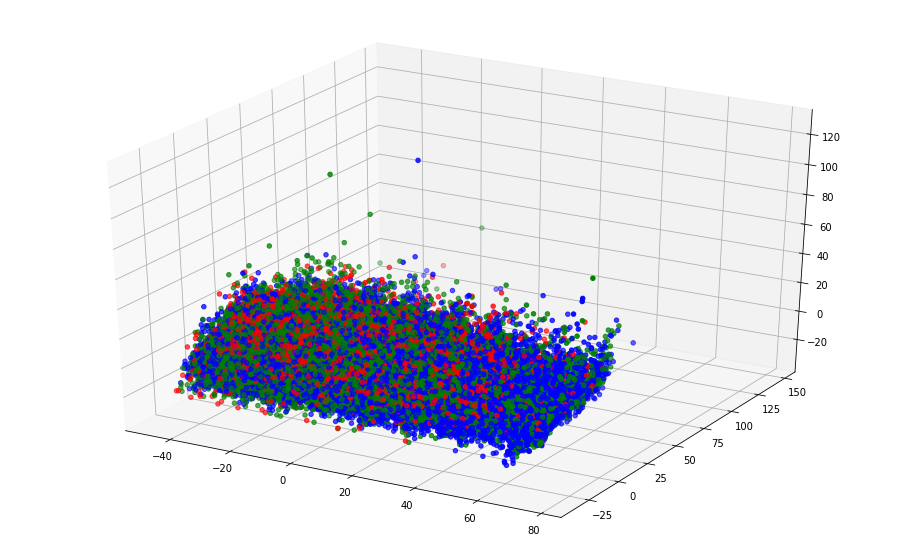

In [25]:
fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')
colors = PCA_dataset_3d['Surge_Pricing_Type'].replace([1, 2, 3], ['red', 'green', 'blue'])
ax.scatter3D(PCA_dataset_3d['PCA_1'],
             PCA_dataset_3d['PCA_2'],
             PCA_dataset_3d['PCA_3'],
             c=colors
            )

In [26]:
pca_corrs = pd.concat([X.corrwith(PCA_dataset_3d.PCA_1), X.corrwith(PCA_dataset_3d.PCA_2), X.corrwith(PCA_dataset_3d.PCA_3)], axis=1)

In [30]:
pca_corrs.sort_values(by=2, ascending=False).head(1)

,0,1,2
Var3,0.293819,-0.026583,0.951081


Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [98]:
np.dot(PCA_dataset_3d['PCA_1'], PCA_dataset_3d['PCA_2'])

2.204615157097578e-09

In [99]:
np.dot(PCA_dataset_3d['PCA_2'], PCA_dataset_3d['PCA_3'])

4.802132025361061e-09

In [100]:
np.dot(PCA_dataset_3d['PCA_1'], PCA_dataset_3d['PCA_3'])

5.929905455559492e-10

In [93]:
pca_corrs = pd.concat([PCA_dataset_3d.corrwith(PCA_dataset_3d.PCA_1), PCA_dataset_3d.corrwith(PCA_dataset_3d.PCA_2), PCA_dataset_3d.corrwith(PCA_dataset_3d.PCA_3)], axis=1)

In [94]:
pca_corrs.columns = ['PCA_1', 'PCA_2', 'PCA_3']

In [95]:
pca_corrs

,PCA_1,PCA_2,PCA_3
PCA_1,1.000000e+00,4.171233e-17,2.848110e-18
PCA_2,4.171233e-17,1.000000e+00,2.166497e-16
PCA_3,2.848110e-18,2.166497e-16,1.000000e+00
Surge_Pricing_Type,1.313990e-01,-5.754804e-03,-7.769403e-02


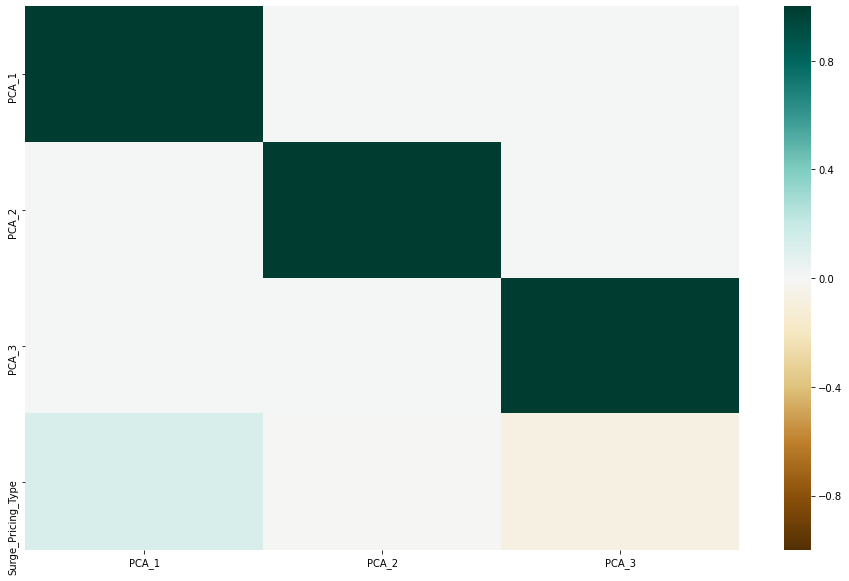

In [35]:
fig = plt.figure()
fig.set_size_inches(16, 10)

sns.heatmap(pca_corrs,
            xticklabels=pca_corrs.columns,
            yticklabels=pca_corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1
           )

**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [37]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [61]:
pca = PCA(n_components=2)
pca.fit(X_centered)

PCA(n_components=2)

In [62]:
pca.transform(X_train)

array([[ 58.61885965,  -0.10230396],
       [ -9.16562688,  -1.49199481],
       [-33.88774724,  -3.08685739],
       ...,
       [  5.13510851,  -1.62023356],
       [-17.40281973, -20.02431448],
       [-28.31905364,  -2.32373838]])

In [63]:
pipe_lr_full = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])

In [64]:
pipe_lr_pca = Pipeline([('scaler', StandardScaler()), ('pca', pca), ('model', LogisticRegression())])

In [65]:
param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
search_lr_full = GridSearchCV(pipe_lr_full, param_grid)

In [68]:
search_lr_pca = GridSearchCV(pipe_lr_pca, param_grid)

In [69]:
search_lr_full.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [1e-05, 0.0001, 0.001, 0.01],
                         'model__penalty': ['l1', 'l2', 'elasticnet']})

In [70]:
search_lr_pca.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [1e-05, 0.0001, 0.001, 0.01],
                         'model__penalty': ['l1', 'l2', 'elasticnet']})

In [71]:
search_lr_full.best_params_

{'model__C': 0.001, 'model__penalty': 'l2'}

In [72]:
search_lr_pca.best_params_

{'model__C': 0.0001, 'model__penalty': 'l2'}

In [74]:
search_lr_pca.best_score_

0.48057041934080375

In [75]:
pipe_lr_full = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(C=0.001, penalty='l2'))])
pipe_lr_pca = Pipeline([('scaler', StandardScaler()), ('pca', pca), ('model', LogisticRegression(C=0.0001, penalty='l2'))])

In [76]:
pipe_lr_full.fit(X_train, y_train)
pipe_lr_pca.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('model', LogisticRegression(C=0.0001))])

In [77]:
print(classification_report(y_test, pipe_lr_full.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.746     0.532     0.621      5372
           2      0.636     0.830     0.720     11349
           3      0.736     0.589     0.655      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.665     26333
weighted avg      0.695     0.681     0.676     26333



In [78]:
print(classification_report(y_test, pipe_lr_pca.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.478     0.698     0.568     11349
           3      0.496     0.504     0.500      9612

    accuracy                          0.485     26333
   macro avg      0.325     0.401     0.356     26333
weighted avg      0.387     0.485     0.427     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [80]:
len(X_test.columns)

28

In [82]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [83]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    accuracy, f1 = train_pca_i(n_components, X_train, y_train)
    accuracy_dict[n_components] = accuracy
    f1_score_dict[n_components] = f1
    
    

Wall time: 1min 44s


In [84]:
accuracy_dict

{2: 0.4842213192572058,
 4: 0.5318801503816504,
 8: 0.585311206470968,
 16: 0.5921467360346333,
 28: 0.6813883720047089}

In [85]:
f1_score_dict

{2: 0.4270213821349992,
 4: 0.4721332421078448,
 8: 0.5197183081127345,
 16: 0.5270578663421794,
 28: 0.6760757307801638}

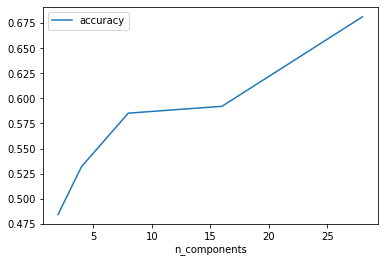

In [91]:
pd.DataFrame(accuracy_dict.items(), columns=['n_components', 'accuracy']).plot(x='n_components', y='accuracy')

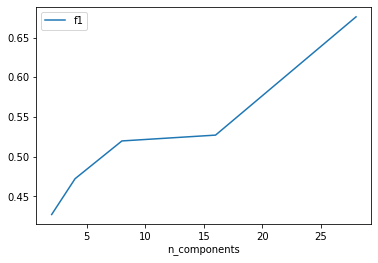

In [92]:
pd.DataFrame(f1_score_dict.items(), columns=['n_components', 'f1']).plot(x='n_components', y='f1')

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [107]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2).fit_transform(X.head(10000))

In [109]:
X_tsne = pd.DataFrame(X_tsne, columns=['TSNE_1', 'TSNE_2'])

In [110]:
X_tsne['Surge_Pricing_Type'] = y.head(10000)

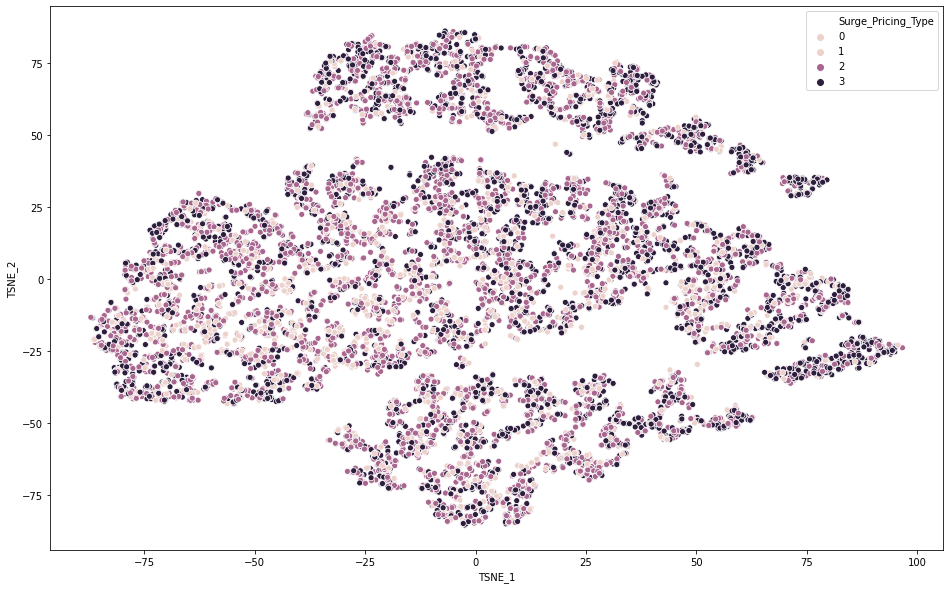

In [111]:
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)

sns.scatterplot(data=X_tsne, x='TSNE_1', y='TSNE_2', hue='Surge_Pricing_Type')

**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [112]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=3).fit_transform(X.head(3000))

In [114]:
X_tsne = pd.DataFrame(X_tsne, columns=['TSNE_1', 'TSNE_2', 'TSNE_3'])
X_tsne['Surge_Pricing_Type'] = y.head(3000)

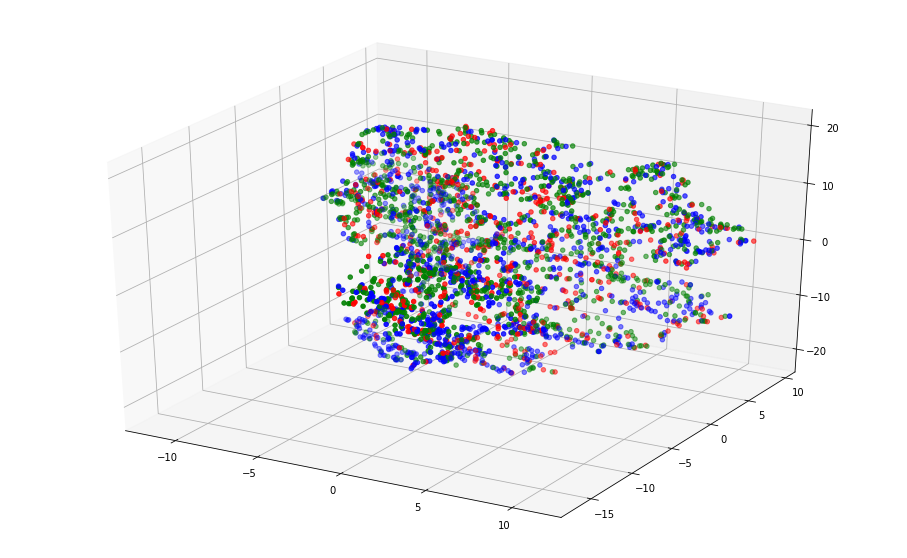

In [119]:
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)
ax = plt.axes(projection='3d')
colors = X_tsne['Surge_Pricing_Type'].replace([1, 2, 3], ['red', 'green', 'blue'])
ax.scatter3D(X_tsne['TSNE_1'],
             X_tsne['TSNE_2'],
             X_tsne['TSNE_3'],
             c=colors
             )

Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!